In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Zachary's Karate Club

The baptism of fire of a network scientist usually is Zachary's karate club network. This network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. It was firstly introduced in 1977 by W.Zachary in "An Information Flow Model for Conflict and Fission in Small Groups".

Just to give you an idea of the historical importance of Zachary's karate club for the networks community, many conferences about networks (like NetSci or CompleNet) have a prize for the talk with the most insightfull use of zachary's graph. 

https://networkkarate.tumblr.com/#:~:text=Philipp%20H%C3%B6vel%20is%20the%2017th,Tarragona%2C%20Spain%2C%20March%202019.

You can load it by typing:

**nx.karate_club_graph()**

In [2]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

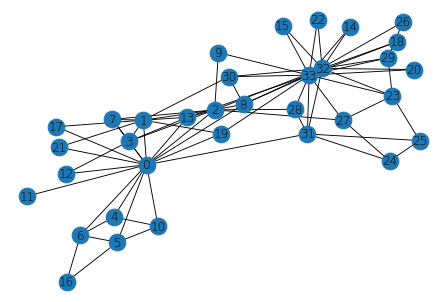

In [3]:
#draw the network
nx.draw(G, pos, with_labels=True, font_weight='light', node_size= 280, width= 0.9)

Due to a conflict between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), the club splitted in two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. 

The two groups are reprsented below.

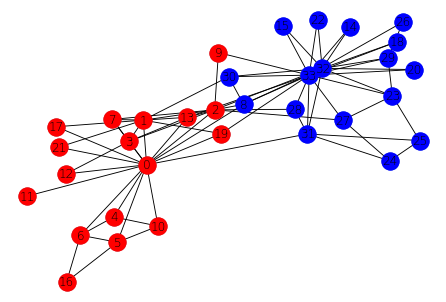

In [4]:
group1 = [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
group2 = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21]

nx.draw(G, pos, with_labels=True, font_weight='light', node_size= 280, width= 0.9)

nx.draw_networkx_nodes(G, pos, nodelist=group1, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=group2, node_color='r')
plt.show()

## Centrality Metrics

### Degree

Now we can use centrality measures to try to detect the administrator "John A" and instructor "Mr. Hi" in the two groups mentioned above.

Firstly we use networkx to compute the degree of each node.

In [5]:
degree_cent = nx.degree_centrality(G)

Then we draw Zachary's karate club with node dimension proportianal to its degree.

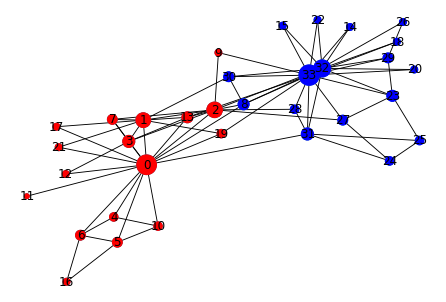

In [6]:
nx.draw(G, pos, node_size=[degree_cent[key] * 800 for key in degree_cent.keys()], edge_color='k',
        with_labels=True, width= 0.9)

nx.draw_networkx_nodes(G, pos, nodelist=group1, node_color='b',
                       node_size=[degree_cent[key] * 800 for key in degree_cent.keys() if key in group1])

nx.draw_networkx_nodes(G, pos, nodelist=group2, node_color='r',
                       node_size=[degree_cent[key] * 800 for key in degree_cent.keys() if key in group2])

plt.show()

As you can notice nodes **33** and **0** are the hubs of the two groups. We can do a similar analysis using betweeness centrallity, what we expect is to find similar results.

As an exercise we plot the degree centrality for every node.

### Betweeness

Another interesting measure of centrality is the betweenness centrality. 
The betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$,
or in other words:

$c(v) = \sum_{s,t} \cfrac{\sigma(s,t|v)}{\sigma(s,t)}$

Betweennes centrality measuare the centrality of a node in a more dynamic way, if compared with the simple degree centrality.

We can compute betweeness cetrality for each node using networkx function:

**nx.betweenness_centrality**

https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html

In [8]:
G_bet = nx.betweenness_centrality(G, normalized=True)

Then, similarly to the previous case, we draw our graph with node dimension proportianal to the observed betweeness centrality.

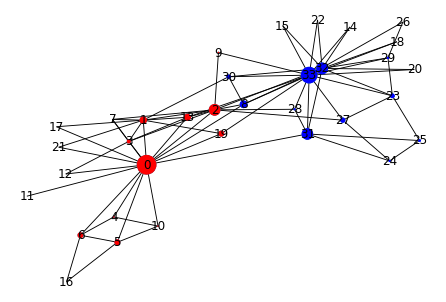

In [14]:
nx.draw(G, pos, node_size=[G_bet[key] * 800 for key in G_bet.keys()], edge_color='k',
        with_labels=True, width= 0.9)

nx.draw_networkx_nodes(G, pos, nodelist=group1, node_color='b',
                       node_size=[G_bet[key] * 800 for key in G_bet.keys() if key in group1])

nx.draw_networkx_nodes(G, pos, nodelist=group2, node_color='r',
                       node_size=[G_bet[key] * 800 for key in G_bet.keys() if key in group2])

plt.show()

Node **33** and **0** play a key role for their respective groups. The fact that you can't see many nodes in the plot is due to their betwenes centrality close to zero.

Similarly to degree centrality we can plot the distribution of the betweeness centrality.

### The importance of Hubs

Lets try to remove Mr Hi and John A and see what happens.

In [15]:
# Lets remove Mr Hi
G.remove_node(0)

# Lets remove John A
G.remove_node(33)

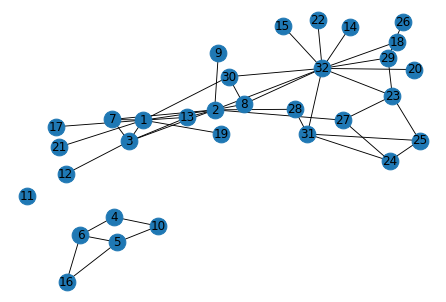

In [28]:
nx.draw(G, pos, node_size=280, with_labels=True, width= 0.9)

As you can notice removing Mr Hi and John A destroyed the network structure!!

Most of the time you will be interested to consider only the **giant connected component (GCC)**.
You can do so, by using the followinf function

**nx.connected_components()**

In [29]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
for i in Gcc:
    print(len(i))

26
5
1


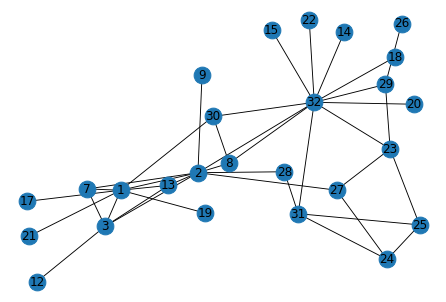

In [30]:
G0 = G.subgraph(Gcc[0])
nx.draw(G0, pos, node_size=280, with_labels=True, width= 0.9)

# Community Detection

We can extrapolate partitions in a network by using community detection algorithms 
based on a certain score function. Here we use one of the most famous score function, the **Modularity**.

**Modularity** measures the strength of division of a network into modules: networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules.

In formula:

$Q = \frac{1}{2m} \sum_{vw} \left[ A_{vw} - \frac{k_v k_w}{2m} \right] \delta(c_v, c_w)$


--> $\frac{1}{2m}$ its a simple normalization factor

--> $A_{vw}$ is the element $vw$ of the adjancency matrix

--> $\frac{k_v k_w}{2m}$ probability a random edge would go between w and w

--> $\delta(c_v, c_w)$ Dirac delta. This function is different from zero
only if rhe two nodes belong to the same community.

We can find the best partitions for a network by maximizing **Q**. This is done as follows:

a)start from an initial partitions of the network. Compute Q.

b)change partition of the network anc compute Q.

c)Doing this severat times and consider the configuaration woth the lowest value of Q

As an example of graph with well defined community we consider the relaxed Caveman graph.

In [34]:
# We import Newman, Clauset and Moore algortithm (https://arxiv.org/abs/cond-mat/0408187)
from networkx.algorithms.community import greedy_modularity_communities
# Lets generate the relaxed Caveman Graph
G = nx.generators.community.relaxed_caveman_graph(5, 8, 0.1)

# Then we extrapolate comunity using modularity maximization
c = list(greedy_modularity_communities(G))

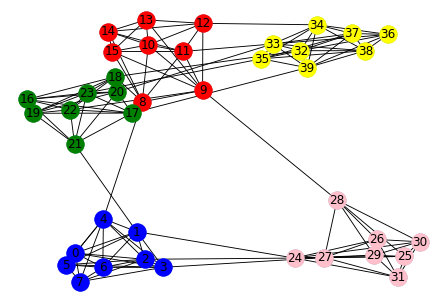

In [35]:
pos = nx.spring_layout(G)

nx.draw(G, pos, edge_color='k',  with_labels=True, node_size= 280, width= 0.9)

nx.draw_networkx_nodes(G, pos, nodelist=c[0], node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=c[1], node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=c[2], node_color='g')
nx.draw_networkx_nodes(G, pos, nodelist=c[3], node_color='pink')
nx.draw_networkx_nodes(G, pos, nodelist=c[4], node_color='yellow')
plt.show()

The community structure can be visualized even in the adjacency matrix of the relaxed caveman graph.

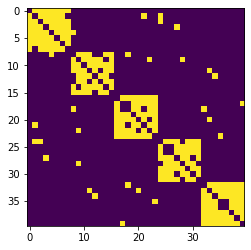

In [36]:
plt.imshow(nx.to_numpy_array(G))
plt.show()

The yellow sqares are edges between nodes, it is easy to notice the five different communities.

If we change nodes order it isn't possible to recognize the community structure anymore.

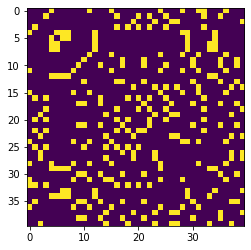

In [37]:
indices = [k for k in range(G.number_of_nodes())]
np.random.shuffle(indices)

plt.imshow(nx.to_numpy_array(G)[indices][:, indices])
plt.show()

# Assortativity vs Disassortativity

Another interesting properties in many real-words network is the assortativity. i.e.

"is a preference for a network's nodes to attach to others that are similar in some way"
https://en.wikipedia.org/wiki/Assortativity

Assortativity mixing ca be of two types:

**assortativity** where nodes tend to be connected with other nodes with similar degree values (social networks).

**disassortativity** where high degree nodes tend to attach to low degree nodes ( technological and biological networks).

As an example we show the case of two real world networks.

We will use the bult-in function:

 **nx.average_neighbor_degree**



## Assortative: Ego-facebook network

This dataset consists of 'circles' (or 'friends lists') from Facebook. (https://snap.stanford.edu/data/ego-Facebook.html). Nodes represents users and two users are connected if they are friends.

In [116]:
# Lets load the edgeslist
edges = np.loadtxt("zebra.txt")

# We initialize the graph using edgeslist
G = nx.Graph()
G.add_edges_from(edges.astype(int))

# and then we compute the average neighbour degree and the degree
avg_degree = nx.average_neighbor_degree(G)
degree = G.degree

x = []
y = []
for key in avg_degree.keys():
    x.append(degree[key])
    y.append(avg_degree[key])

In [117]:
avg_y=[]
y=np.array(y)
for i in np.unique(x):
     avg_y.append(np.mean(y[x==i]))

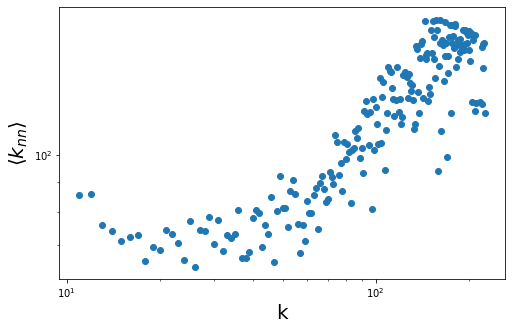

In [118]:
plt.figure(figsize=(8,5))

plt.plot(np.unique(x)[10:-13],avg_y[10:-13], marker="o", ls="None")
plt.xlabel("k",fontsize=20)
plt.ylabel(r"$\langle k_{nn} \rangle$",fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.show()

## Disassortative: CAIDA 

Here we consider the CAIDA network (https://snap.stanford.edu/data/as-733.html) where nodes are routers and two nodes are
connected if there is an exchange of traffic flow

In [99]:
# Lets load the edgeslist
edges = np.loadtxt("CAIDA.txt")

# We initialize the graph using edgeslist
G = nx.Graph()
G.add_edges_from(edges.astype(int))

# and then we compute the average neighbour degree and the degree
avg_degree = nx.average_neighbor_degree(G)
degree = G.degree

x = []
y = []
for key in avg_degree.keys():
    x.append(degree[key])
    y.append(avg_degree[key])

In [100]:
avg_y=[]
y=np.array(y)
for i in np.unique(x):
     avg_y.append(np.mean(y[x==i]))

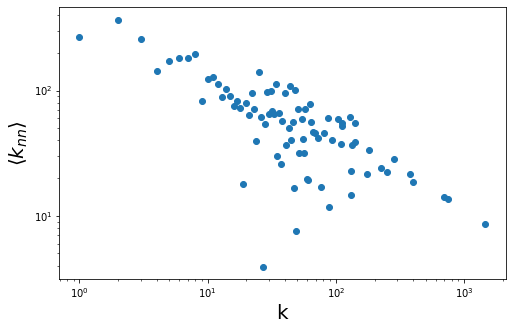

In [101]:
plt.figure(figsize=(8,5))

plt.plot(np.unique(x), avg_y, marker="o", ls="None")
plt.xlabel("k",fontsize=20)
plt.ylabel(r"$\langle k_{nn} \rangle$",fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.show()

# US airports Networks

Lets move now to the case of a directed weighted network and study the characteristics of the US airports network.

This is the directed network of flights between US airports in 2010. Each edge represents a connection from one airport to another, and the weight of an edge shows the number of flights on that connection in the given direction, in 2010. To make things simpler we won't consider edges' weights.

First of all we initiliaze the network from its edgelist.

In [ ]:
# We load the edgelist
np_edgelist = np.loadtxt("opsahl-usairport.txt")
# Then we discharge weights information
np_edgelist = np_edgelist[:, 0:2].astype(int)

# We use the edgelist to initilize a directed graph instance
G = nx.DiGraph()
G.add_edges_from(np_edgelist)

print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())

As you can notice the US airport network is quite big and it would be a mess to draw it with networkx. On the other hand, we can use other tools to draw this network as **Gephi**.

### Saving the network for Gephi

Now we save the US airports network, with the degree centrality measures we computed, in a format that Gephi can read: GEXF (Graph Exchange XML Format).

Networkx has built-in functions reading and writing GEXF format. We can save our graph in GEXF format by running the following command.

In [105]:
nx.write_gexf(G, "US_airports.gexf")

Another format accepted by Gephi is .gml

In [106]:
nx.write_gml(G, "US_airports.gml")

NetworkXError: 1 is not a string